In [86]:
import time
i=time.time()

# Baixa zip

In [87]:
%run '/home/andre301267/git/Pricing-Fertilizer/codes/function/Comexstat/baixa_zip.ipynb'

**Função baixa_zip(url,local_filename) disponível**


In [88]:
url = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/ncm/IMP_COMPLETA.zip'
local_filename = '/home/andre301267/git/Pricing-Fertilizer/DB/temp/IMP_COMPLETA.zip'

In [89]:
baixa_zip(url,local_filename)

Arquivo salvo como /home/andre301267/git/Pricing-Fertilizer/DB/temp/IMP_COMPLETA.zip


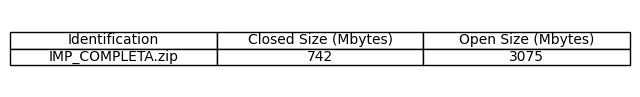

In [90]:
import os
import zipfile

# Get the file size in bytes
file_size_closed = os.path.getsize(local_filename)

# Assuming the file is a zip, get the size of the uncompressed content

with zipfile.ZipFile(local_filename, 'r') as zip_ref:
    file_size_open = sum([zinfo.file_size for zinfo in zip_ref.infolist()])

# Create a markdown table
markdown_content = f"""
| Identification         | Closed Size (Mbytes)            |            Open Size (Mbytes) |
|------------------------|---------------------------------|-------------------------------|
| {local_filename[-12:]} | {round(file_size_closed/10**6)} | {round(file_size_open/10**6)} |
-------------------------------------------------------------------------------------------
"""
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 1))

# Hide the axes
ax.axis('off')

# Create the table
table = ax.table(cellText=[["Identification", "Closed Size (Mbytes)", "Open Size (Mbytes)"],
                           [local_filename[-16:], round(file_size_closed/10**6), round(file_size_open/10**6)]],
                 colLabels=None, cellLoc='center', loc='center')

# Save the table as an image
plt.savefig('/home/andre301267/git/Pricing-Fertilizer/DB/temp/file_info.png'\
            , bbox_inches='tight', dpi=300)

In [91]:
print(markdown_content)


| Identification         | Closed Size (Mbytes)            |            Open Size (Mbytes) |
|------------------------|---------------------------------|-------------------------------|
| COMPLETA.zip | 742 | 3075 |
-------------------------------------------------------------------------------------------



# Carrega tabelas complementares

In [92]:
%run '/home/andre301267/git/Pricing-Fertilizer/codes/function/Comexstat/extrai-tab_complementares.ipynb'

Variáveis disponíveis: ncm, ncm_sh, pais,uf_mun,uf,via,urf


Reconhecer os códigos mais abrangentes dos produtos de interesse no sistema internacional SH:

# Identifica código foco

In [93]:
co_sh2_fert=ncm_sh[ncm_sh.NO_SH2_POR.str.lower().str.contains('fertilizante')]['CO_SH2'].unique()
co_sh2_fert

array([31])

Lista os códigos SH6 contidos no código SH2 de fertilizantes:

In [94]:
ncm_sh_list=ncm_sh[ncm_sh.CO_SH2.isin(co_sh2_fert)]['CO_SH6'].unique()
ncm_sh_list

array([310100, 310210, 310221, 310229, 310230, 310240, 310250, 310260,
       310270, 310280, 310290, 310310, 310311, 310319, 310320, 310390,
       310410, 310420, 310430, 310490, 310510, 310520, 310530, 310540,
       310551, 310559, 310560, 310590])

Lê tabela com código comum ao Mercosul, que é o de maior especificação de produto.

Na última tabela de NCM, localizamos os códigos NCM que se relacionam aos SH6 de fertilizantes.

In [95]:
list_ncm_fert=ncm[ncm.CO_SH6.isin(ncm_sh_list)].CO_NCM.unique()
list_ncm_fert

array([31053000, 31031100, 31031900, 31059011, 31059019, 31059090,
       31031020, 31031030, 31032000, 31039011, 31053010, 31053090,
       31054000, 31055100, 31055900, 31056000, 31010000, 31021010,
       31021090, 31022100, 31022910, 31022990, 31023000, 31024000,
       31025011, 31025019, 31025090, 31026000, 31027000, 31028000,
       31029000, 31031010, 31039019, 31039090, 31041000, 31042010,
       31042090, 31043010, 31043090, 31049010, 31049090, 31051000,
       31052000])

Identificando os nomes dos arquivos no interior do IMP_COMPLETA.zip

In [96]:
%run '/home/andre301267/git/Pricing-Fertilizer/codes/function/Comexstat/Id_internal_zipfile.ipynb'

** Função id_internal_zipfile(local_filename)disponível **


In [97]:
internal_zipfile=id_internal_zipfile(local_filename)

IMP_COMPLETA.csv


# Visualiza primeiras linhas do interno

In [98]:
%run '/home/andre301267/git/Pricing-Fertilizer/codes/function/Comexstat/vslz_primeiras_linhas.ipynb'

** Função vslz_primeiras_linhas(local_filename,internal_zipfile) disponível**


In [99]:
vslz_primeiras_linhas(local_filename,internal_zipfile)

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO
0,1997,9,29251990,10,87,SP,1,817800,200,200,4888,180,24
1,1997,8,85049010,10,399,SP,4,817600,4891,84,30116,409,93
2,1997,8,54023300,10,63,SP,7,1010900,143834,143834,402427,10121,266
3,1997,3,38121000,10,249,SP,1,817800,9434,9172,61190,3011,163
4,1997,10,73209000,10,399,SP,4,817600,222510,49,3638,456,18


# Extrai filtrando

In [100]:
%run '/home/andre301267/git/Pricing-Fertilizer/codes/function/Comexstat/extrai_filtrando_ncm.ipynb'

** Função extrai_filtrando_ncm(local_filename,internal_zipfile) disponível **


In [101]:
imp_fert=extrai_filtrando_ncm(local_filename,internal_zipfile)

df imp_fert disponível


# Corrige Columns Name

In [102]:
imp_fert=imp_fert.rename(columns={'SG_UF_NCM':'UF'})

# Salva arquivo extraído e filtrado

In [103]:
imp_fert.to_csv('/home/andre301267/git/Pricing-Fertilizer/DB/temp/imp_fert_ncm.csv', index=False)

In [104]:
import os

# Verificar se o arquivo existe antes de tentar excluí-lo
if os.path.exists(local_filename):
    os.remove(local_filename)
    print(f'O arquivo {local_filename} foi excluído com sucesso.')
else:
    print(f'O arquivo {local_filename} não foi encontrado.')

O arquivo /home/andre301267/git/Pricing-Fertilizer/DB/temp/IMP_COMPLETA.zip foi excluído com sucesso.


In [105]:
imp_fert

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,UF,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO
266,1997,12,31042090,10,23,RS,1,1015400,7130535,7130535,922261,85567,1935
874,1997,3,31027000,10,249,SP,1,817800,12,6,103,4,0
1095,1997,11,31042090,10,249,SP,4,817600,12,1,1197,35,6
1543,1997,12,31021010,10,831,SC,1,920151,4507463,4507463,549976,54024,0
2273,1997,3,31022100,10,23,RJ,1,717600,144,7200,15582,681,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41834074,2024,6,31022100,10,160,GO,1,917800,1950062,1950062,271060,37050,0
41834331,2024,1,31059090,10,403,RS,1,1017700,96000,96000,80307,6612,26
41834486,2024,6,31023000,10,676,RS,1,1017700,5128932,5128932,1159272,174250,1134
41834619,2024,8,31052000,10,53,MS,1,917800,1000000,1000000,318500,24500,0


In [106]:
f=time.time()
print(f"Tempo de execução: {round((f-i)/60,1)} minutos.")

Tempo de execução: 3.9 minutos.
